# **Import Library**

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Import Dataset**

In [26]:
df = pd.read_csv('Train.csv')

Upload `Train.csv` data.

# **Data Information Exploration**

In [27]:
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


Show the first 5 rows of data

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


**Content**

The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

* **ID**: ID Number of Customers.

* **Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

* **Mode of shipment**: The Company Ships the products in multiple way such as Ship, Flight and Road.

* **Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.

* **Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

* **Cost of the product**: Cost of the Product in US Dollars.

* **Prior purchases**: The Number of Prior Purchase.

* **Product importance**: The company has categorized the product in the various parameter such as low, medium, high.

* **Gender**: Male and Female.

* **Discount offered**: Discount offered on that specific product.

* **Weight in gms**: It is the weight in grams.

* **Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

**Observation**:

1. Seems need to convert `Customer_rating` type from int46 to string format (***categorical***).
2. Seems need to convert `Prior_purchases` type from int46 to string format (***categorical***).
3. Seems need to convert `Reached.on.Time_Y.N` type from int46 to string format (***booleant***).

In [29]:
df.duplicated().sum()

0

overall there **aren't** duplicated data in dataframe.

In [30]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

and there **aren't** null data or missing value in dataframe.

# **Data Cleansing**

In [31]:
df['Customer_rating'] = df['Customer_rating'].apply(str)
df['Customer_rating'].describe()

count     10999
unique        5
top           3
freq       2239
Name: Customer_rating, dtype: object

In [32]:
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].apply(str)
df['Reached.on.Time_Y.N'].describe()

count     10999
unique        2
top           1
freq       6563
Name: Reached.on.Time_Y.N, dtype: object

In [33]:
df['Prior_purchases'] = df['Prior_purchases'].apply(str)
df['Prior_purchases'].describe()

count     10999
unique        8
top           3
freq       3955
Name: Prior_purchases, dtype: object

Now `Customer_rating`, `Prior_purchases` & `Reached.on.Time_Y.N` column data format has become **object**.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  object
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  object
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  object
dtypes: int64(5), object(7)
memory usage: 1.0+ MB


# **Statistical Summary**

In this method, we will **classify columns** according to their **data types**.

In [35]:
categoricals = ['Warehouse_block', 'Mode_of_Shipment', 'Prior_purchases', 'Customer_rating', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']
numericals = ['ID', 'Customer_care_calls', 'Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']

In [36]:
df[numericals].describe()

,ID,Customer_care_calls,Cost_of_the_Product,Discount_offered,Weight_in_gms
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,210.196836,13.373216,3634.016729
std,3175.28214,1.141490,48.063272,16.205527,1635.377251
min,1.00000,2.000000,96.000000,1.000000,1001.000000
25%,2750.50000,3.000000,169.000000,4.000000,1839.500000
50%,5500.00000,4.000000,214.000000,7.000000,4149.000000
75%,8249.50000,5.000000,251.000000,10.000000,5050.000000
max,10999.00000,7.000000,310.000000,65.000000,7846.000000


**Observation**:
* We don't need to discuss `ID` column.
* Overall, the minimum and maximum values make sense for each column.
* Mean ~ 50% (Median) in `Customer_care_calls` & `Cost_of_the_Product` column, indicating somewhat a symmetrical distribution.
* But Mean ~ 50% (Median) in `Discount_offered` column are positive skew distribution, because means > median.
* And `Weight_in_gms` column are negative skew distribution, because means < median.

In [37]:
df[categoricals].describe()

,Warehouse_block,Mode_of_Shipment,Prior_purchases,Customer_rating,Product_importance,Gender,Reached.on.Time_Y.N
count,10999,10999,10999,10999,10999,10999,10999
unique,5,3,8,5,3,2,2
top,F,Ship,3,3,low,F,1
freq,3666,7462,3955,2239,5297,5545,6563


**Observation**:
* `Gender` column have 2 unique value, 'M' and 'F', it means the value are 'Male' and 'Female'.
* `Reached.on.Time_Y.N` column have 2 unique value 1 and 0, it means the value are 'True' and 'False'.


In [38]:
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of Warehouse_block column
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64 

Value counts of Mode_of_Shipment column
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64 

Value counts of Prior_purchases column
3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64 

Value counts of Customer_rating column
3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64 

Value counts of Product_importance column
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64 

Value counts of Gender column
F    5545
M    5454
Name: Gender, dtype: int64 

Value counts of Reached.on.Time_Y.N column
1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64 



# **Multivariate Analysist (Countplot)**

Try to show a graph **(barchart)** from `Warehouse_block` and `Mode_of_Shipment` columns, to figure out the insight from data.

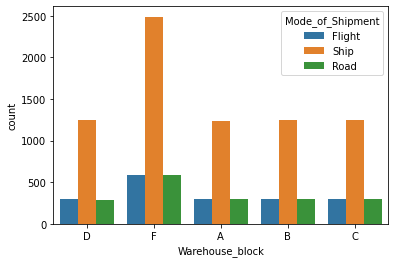

In [39]:
sns.countplot(data=df,
            x='Warehouse_block',
            hue='Mode_of_Shipment')

**Observation**:
1. It can be concluded that from each warehouse block the average of all shipping methods using sea routes (ships).
2. And delivery methods using land and air routes equally in each warehouse block.

Next show a graph **(barchart)** from `Warehouse_block` and `Reached.on.Time_Y.N` columns, to figure out the insight from data.

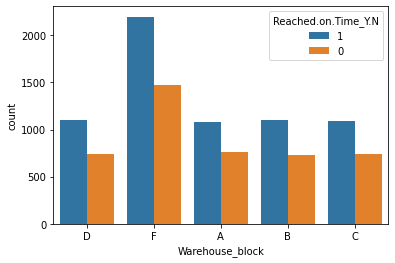

In [40]:
sns.countplot(data=df,
            x='Warehouse_block',
            hue='Reached.on.Time_Y.N')

**Observation**:

It can be concluded from each warehouse block that the percentage of deliveries that are not on time is higher than that of on time deliveries.



Next show a graph **(barchart)** from `Warehouse_block` and `Product_importance` columns, to figure out the insight from data.

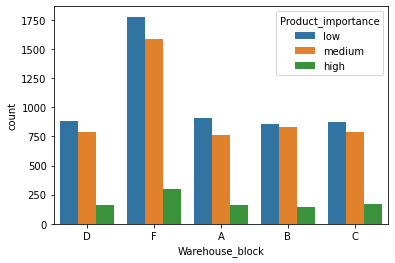

In [41]:
sns.countplot(data=df,
            x='Warehouse_block',
            hue='Product_importance')

**Observation**:

It can be concluded that the average product importance from each warehouse block is in the low and medium categories, while the highest importance is the least in every block.

Next show a graph **(barchart)** from `Prior_purchases` and `Reached.on.Time_Y.N` columns, to figure out the insight from data.

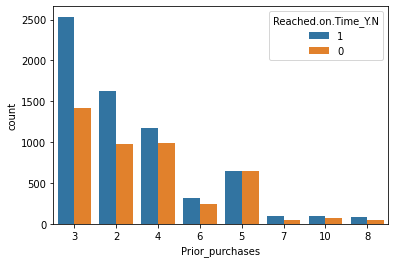

In [42]:
sns.countplot(data=df,
            x='Prior_purchases',
            hue='Reached.on.Time_Y.N')

**Observation**:

It is concluded that most shipping customers choose priority 3 products, and sadly even the most priority products (priority 2) still have more deliveries that are not on time.

# **Univariate Analysist: KDE plot for knowing the distribution form**

Let's try to display a graph of all the contents of the numeral type to see the shape of the distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

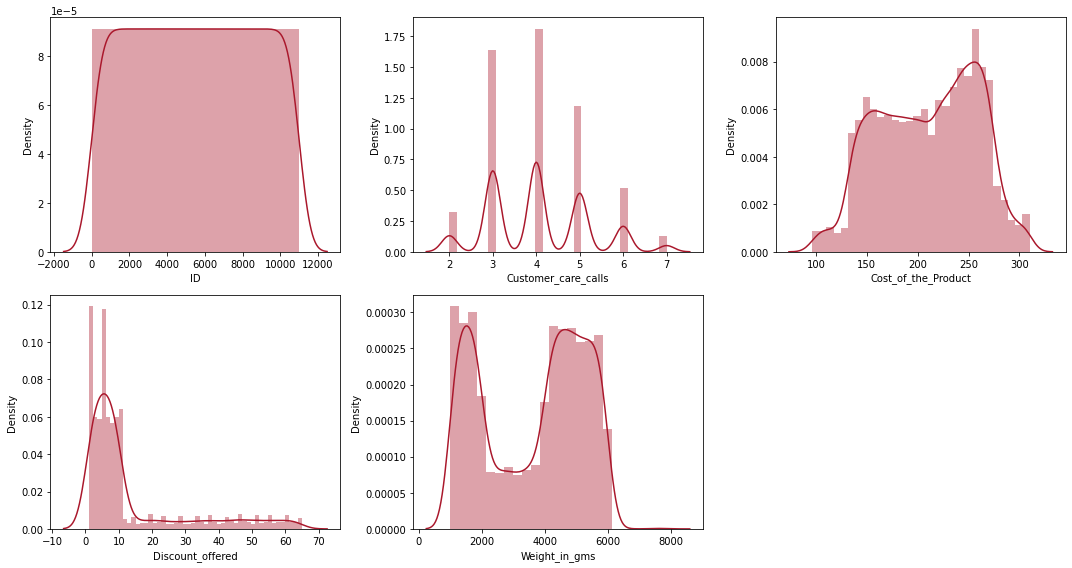

In [43]:
plt.figure(figsize=(15,8))

features = numericals
for i in range(len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.distplot(x=df[features[i]], color='#aa182c')
    plt.xlabel(features[i])
    plt.tight_layout()

**Observation**:
1. `ID` column have unique value that never have the same or duplicate value.
2. At `Cost_of_the_Product` columns value, we know that the highest density point at cost about 265 US Dollars.
3. At `Discount_offered` columns value is positive skew, where we know that the highest frequency point at 10 first product categoric.
4. At `Weight_in_gms` column, many of the products shipped weigh around 1500 - 1800 grams and 4200 - 6000 grams.

# **EDA Conclusion**

1. The data does not contain major issues.
2. Overall, the minimum and maximum values in *numericals class* make sense for each column.
3. Each warehouse block the average of all shipping methods using sea routes (ships), and delivery methods using land and air routes equally in each warehouse block.
4. Each warehouse block that the percentage of deliveries that are not on time is higher than that of on time deliveries.
5. The average product importance from each warehouse block is in the low and medium categories, while the highest importance is the least in every block.
6. The most shipping customers choose priority 3 products, and sadly even the most priority products (priority 2) still have more deliveries that are not on time.
7. The highest frequency at cost of product about 265 US Dollars.
8. Many of the products shipped weigh around 1500 - 1800 grams and 4200 - 6000 grams.